In [ ]:
# Importamos una función de una libreria llamada sklearn
# Es una librería mu yimportante en el mundo del machine learning.. que incorpora muchas funciones de alto nivel ya precreadas.
# Importamos en concreto la función: fetch_openml
# Nos permite cargar conjuntos de datos opensource para machine learning: MNIST (BBDD con 70000 images de dígitos .. y el dígito que está representado en la foto)
from sklearn.datasets import fetch_openml

In [ ]:
datos = fetch_openml('mnist_784', as_frame=False, cache=False) # Fotos de 28 pixels, por 28 pixels...
datos.data.shape # Imprimir por pantalla, las dimensiones de mi conjunto de datos.

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(70000, 784)

In [ ]:
# Tenemos 70.000 fotos... De cada una 784 pixels
# Dentro del data, tenemos las fotos... los 784 pixels de cada foto (para cada pixel, un valor numérico 0-255)
#datos.data
# Dentro de target, tenemos los números (dígitos) representados en cada foto
datos.target.shape


(70000,)

In [ ]:
# Tengo 70000 datos de los nñumeros que hay en cada foto
datos.target # Veo los datos... algunos de lllos.. no los 70000

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [ ]:
# Los pixels de cada foto, los vamos a meter en una tabla... que vamos a llamar variable X
# Los dígitos asociados a cada fot, los voy a meter en una variable que llamaré Y
x = datos.data.astype('float32') # Los datos de los pixels, los quiero como decimales (0-255)
y = datos.target.astype('int64') # Los datos de los dígitos, los quiero como enteros:  Números del 0 al 9

In [ ]:
# Como los valores de Y están en el rango 0-9... y las X 0-255... Al hacer cuentas podemos tener valores muy chicos 1/255
# Me interesan los datos en el mismo orden de magnitud
x = x / 255.0 # De esta forma, los valores de los pixels quedan entre 0-1... que es más similar al orden de magnitud en el que tengo los dígitos 0-9

In [ ]:
# Dividir los datos en 2 grupos... Datos de entrenamiento y datos de prueba
# Voy a querer entrenar al programa con una parte de los datos...
# Y voy a ver que tal funciona ese programa cuando lo aplico a la otra parte de los datos...
# De esta forma evitamos ese concepto: Overfitting: Sobreajuste... que el programa que se va a crear funcione bien pero solo para los datos con los que ha sido entrenado


In [ ]:
from sklearn.model_selection import train_test_split
x_entrenamiento, x_prueba, y_entrenamiento, y_prueba = train_test_split(x,y, test_size=0.25) # Reparto aleatorio de los datos... De los 70000

In [ ]:
x_entrenamiento.shape # Quiero ver cuantos datos de entrenamiento tengo

(52500, 784)

In [ ]:
import matplotlib.pyplot as plt # Esta libreria nos permite pintas imagenes en python
def imprimir_imagenes(x, y): # Me creo una función que usa esa librería y toma 5 fotos... con su caracter asociado... y los pinta por tantalla
    for i, (img, y) in enumerate(zip(x[:5].reshape(5, 28, 28), y[:5])):
        plt.subplot(151 + i) # Pinta la imagen 151 pixels más a la derecha que la anterior
        plt.imshow(img) # Pînta la imagen
        plt.xticks([]) # No poner en el grafico marcas en los ejes
        plt.yticks([])
        plt.title(y)   # Pone el caracter como leyenda de cada foto

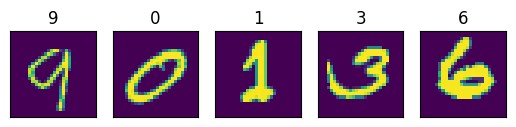

In [ ]:
imprimir_imagenes(x_entrenamiento, y_entrenamiento)

In [ ]:
# Montar una red neuronal
# Lo primero importaar la libreria que nos ayuda con redes neuronales
import torch
from torch import nn
import torch.nn.functional as F

In [ ]:
# Si hay disponible una GPU, úsala
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
# Definir la arquitectura de la red neuronal


In [ ]:
import numpy as np

mnist_dim = x.shape[1]  # En primera capa tendremos 784 datos... Cada pixel
hidden_dim = int(mnist_dim/8) # En segunda capa tenemos 784/8 = 98 neuronas de aprendizaje
output_dim = len(np.unique(datos.target)) # Al final quiero 10 neuronas ( los distintos - unicos- valores que hay en el target... los digitos que hay representados: 0-9)
mnist_dim, hidden_dim, output_dim # Los veo por pantalla

(784, 98, 10)

In [ ]:
# Quiero una red neuronal para clasificacion

class MiArquitecturaDeRed(nn.Module):
    def __init__(
            self,
            input_dim=mnist_dim,    # Aqui es donde configuro la arquitectura de la red Cuantas entradas
            hidden_dim=hidden_dim,  # Cuantas neuronas en capa oculta
            output_dim=output_dim,  # Cuantas salidas (casificaciones diferentes)
            dropout=0.5,            # Entre iteracion e iteración (cada vez que calcules numeritos, deja de usar la mitad de las neuronas)
                                    # Para evitar que algunas neuronas se vuelvan vagas... wue no aprendan
    ):
        super(MiArquitecturaDeRed, self).__init__()
        self.dropout = nn.Dropout(dropout)              # Activamos ese hecho de desactivar el 50% de las nueronas en cada entrenamiento
        self.hidden = nn.Linear(input_dim, hidden_dim)  # conecto todas las variables de entrada (784 pixels) a las neuronas de la capa de aprendizaje (98)
        self.output = nn.Linear(hidden_dim, output_dim) # Conecto todas las salidas de las 98 neuronas de aprendizaje a las 10 posibles salidas

    def forward(self, x, **kwargs):   # Aquí configuramos la función de activación de cada neurona
        x = F.relu(self.hidden(x))    # Las neuronas de la capa oculta tienen una función de activación de tipo RELU. APRENDIZAJE
        x = self.dropout(x)
        x = F.softmax(self.output(x), dim=-1) # Las neuronas de claficicación (10) tienen una función de activación de tipo SOFTMAX. CLASIFICACIONES
        return x

In [ ]:
import subprocess

try:
    import google.colab
    subprocess.run(['python', '-m', 'pip', 'install', 'skorch']) # Instala la libreria skorch en el entorno
except ImportError:
    pass

In [ ]:
# Aqui ahora, que ya definido la arquitectura (la forma) que tiene mi red
# indico como debe entrenarse
from skorch import NeuralNetClassifier # Quiero poder usar entrenamientos especializados en Clasificación de datos

torch.manual_seed(0) # El entrenamiento de la red, empieza con unos valores de los parametros internos aleatorios
                     # Habitualmente usamos una SEMILLA a la hora de generar los valores aleatorios
                     # Los programas informáticos no generan números aleatorios... realmente son secuencias de números pseudoaleatorios
                     # Al poner una semilla, nos aseguramos que siemrpe se generen los mismo valores "aleatorios" cuando comienza el entrenamiento.
                     # Si ejecuto este programa 20 veces... Las 20 veces vamos a usar los mismos números "aleatorios"
                     # Importa una mierda el número que ponga ahi. Lo único importante es mantener ese número constante entre ejecuciones
                     # Esto me permite replicar resultados entre ejecuciones o entornos

mi_red = NeuralNetClassifier( # Quiero un entrenamiento para clasificación de datos
    MiArquitecturaDeRed,   # para una nueva red que tenga esa arquitectura que he definido arriba
    max_epochs=20,         # Quiero 20 iteraciones de entrenamiento
    lr=0.1,                # Learning rate: Tiene que ver con la velocidad con la que cambian los parametros entre una iteración y otra 0.0001 - 0.1
    device=device,         # Quiero que entrenes con cpu o gpu
)

In [ ]:
# Entrena la red con los datos que tengo...
# Inventate valores (80000 valores), para los parámetros internos...
# Ve probando con ellos, a ver si va bien la cosa y aciertas mucho...
# Ve variando esos valores (casí 80000 valores) hasta 20 veces (a buen ritmo)
# Con nuestras 52500 fotos
mi_red.fit(x_entrenamiento, y_entrenamiento) # Esto es lo que tardará la vida

  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.8247       0.8939        0.3940  1.7797
      2        0.4294       0.9152        0.3021  1.0484
      3        0.3607       0.9248        0.2625  1.3864
      4        0.3180       0.9327        0.2323  1.5059
      5        0.2912       0.9388        0.2107  1.1401
      6        0.2710       0.9416        0.1963  1.0634
      7        0.2571       0.9456        0.1854  1.0685
      8        0.2426       0.9473        0.1741  1.0292
      9        0.2330       0.9504        0.1657  1.0737
     10        0.2227       0.9529        0.1566  1.0629
     11        0.2133       0.9536        0.1515  1.0395
     12        0.2087       0.9557        0.1446  1.1109
     13        0.2006       0.9570        0.1397  1.0296
     14        0.1961       0.9569        0.1378  1.2149
     15        0.1907       0.9581        0.1350  1.4423
     16        0.1848       0.9

<class 'skorch.classifier.NeuralNetClassifier'>[initialized](
  module_=MiArquitecturaDeRed(
    (dropout): Dropout(p=0.5, inplace=False)
    (hidden): Linear(in_features=784, out_features=98, bias=True)
    (output): Linear(in_features=98, out_features=10, bias=True)
  ),
)

In [ ]:
# Llegados a este punto, ya tengo entrenada la red neuronal. Ya es "Experta" en reconocer dígitos en fotos.
# Parece que acierta muchas fotos... El ultimo datos es el 96,1% de las fotos.. eso si... sobre las propias fotos que ha usado para entrenarse.. ESO ES FACIL
# Me interesa probar esto con otro conjunto de fotos... a ver que tal... Y aqui viene el trozo de fotos que habiamos reservado para pruebas

from sklearn.metrics import accuracy_score
# Pongo la red a funcionar
y_estimada = mi_red.predict(x_prueba) # Yo creo que en esta foto hay un 7... o un 8... o un 5
# Comparar las predicciones/estimaciones con los datos reales, que los conocía y_prueba
accuracy_score(y_prueba, y_estimada)

0.962

In [ ]:
# En los 0 segundos que ha tardado el punto anterior, lo primero que ha hecho ha sido coger las 17500 fotos de pruebas,
# Mirarlas... y decirme qué digito hay en ellas.
# De las fotos de prueba ha acertado en el 96,2%... LO PETA

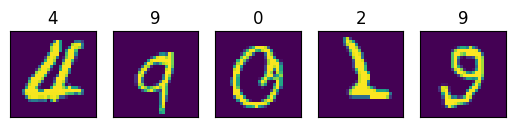

In [ ]:
# Vamos a mirar algunas de las que ha fallado
filtro_erroneas = y_prueba != y_estimada # Esto me da un array / lista gigante de True, False
                  # 7            7   ->    False
                  # 6            8   ->    True
                  # 5            5   ->    False
                  # 4            3   ->    True
fotos_no_acertadas   = x_prueba[filtro_erroneas]
digitos_no_acertadas = y_prueba[filtro_erroneas]
imprimir_imagenes(fotos_no_acertadas, digitos_no_acertadas)